In [1]:
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt

1.16.5


In [2]:
%run 4.3.2-common.ipynb

Principal values are [ 7574.07972718 12102.20973895]


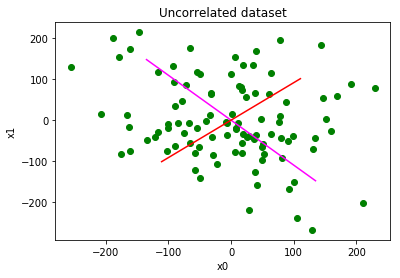

Loss in Information due to
dimensionality reduction: 61.2610700963
(high - we're losing real info)


In [3]:
# Let us now try a similar experiment with
# uncorrelated data 
N = 100
x_0 = np.random.normal(0, 100, N)
x_1 = np.random.normal(0, 100, N)
X = np.column_stack((x_0, x_1))

# Perform PCA
# Note that principal values are close to
# each other - the spread is comparable in both
# directions.
principal_values, principal_components = pca(X)
print("Principal values are {}".format(principal_values))

# Find the index with highest principal value
major_index = np.argmax(principal_values)
minor_index = np.argmin(principal_values)

# Plot
plt.figure()
plt.scatter(X[:, 0], X[: , 1],
            color="green")
plt.title('Uncorrelated dataset')
plt.xlabel('x0')
plt.ylabel('x1')

# Let us plot the principal components
draw_line(principal_components[:, major_index],
          min_x=-200, max_x=200)
draw_line(principal_components[:, minor_index],
          min_x=-150, max_x=150, color="red")
plt.show()

first_principal_vec = principal_components[:,
                                           major_index]
first_principal_vec = first_principal_vec.reshape((-1,
                                                   1))
X_proj = np.dot(X, first_principal_vec)

# Information lost due to dimensionality reduction.
# (here we've lost real info)
X_back_proj = np.dot(X_proj,
                     np.linalg.pinv(first_principal_vec))
info_loss = np.sqrt(np.mean((X_back_proj - X)**2))
print("Loss in Information due to\ndimensionality"
      " reduction: {}\n(high - we're "
      "losing real info)".format(info_loss))